# Side by side comparison

In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

ncct_dir = "../../data/gravo/NCCT/"
nccts = [f for f in os.listdir(ncct_dir) if f.endswith("nii") and "-" not in f]

['2270965.nii', '2548328.nii', '1520491.nii'] [0, 0, 2]


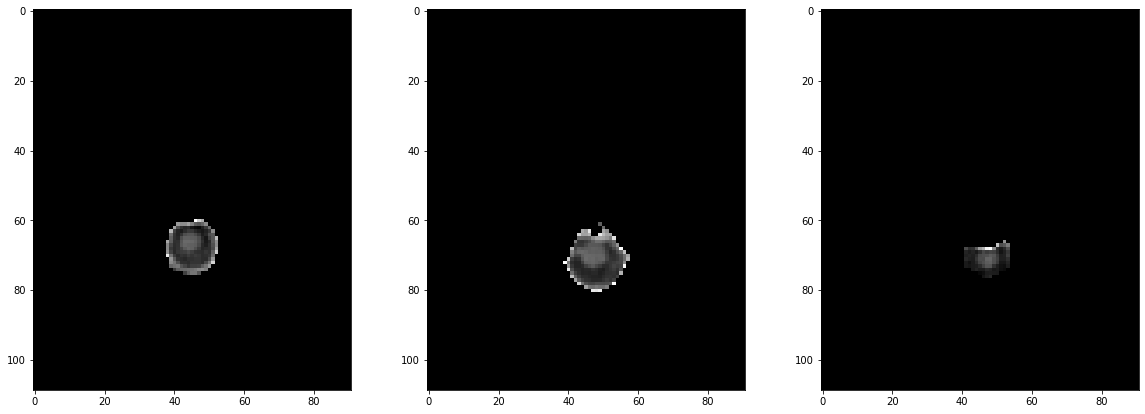


['2270965.nii', '2548328.nii', '1520491.nii'] [1, 1, 3]


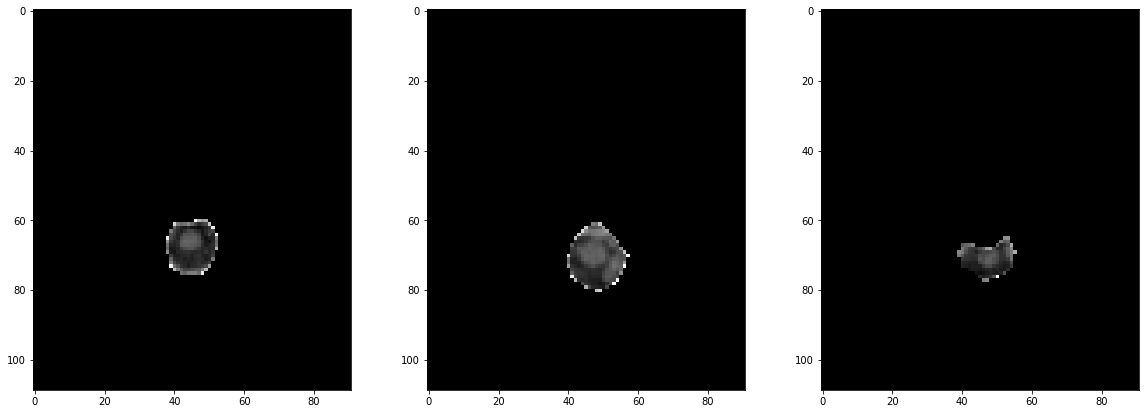


['2270965.nii', '2548328.nii', '1520491.nii'] [2, 2, 4]


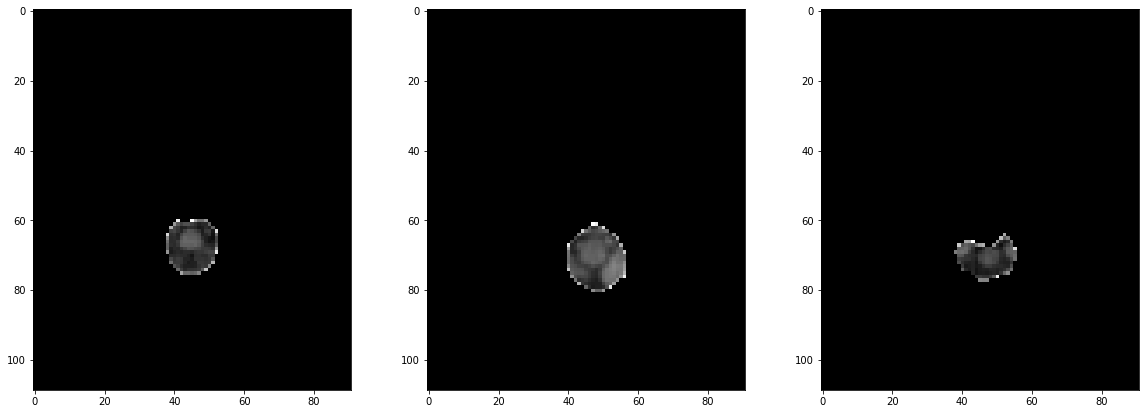


['2270965.nii', '2548328.nii', '1520491.nii'] [3, 3, 5]


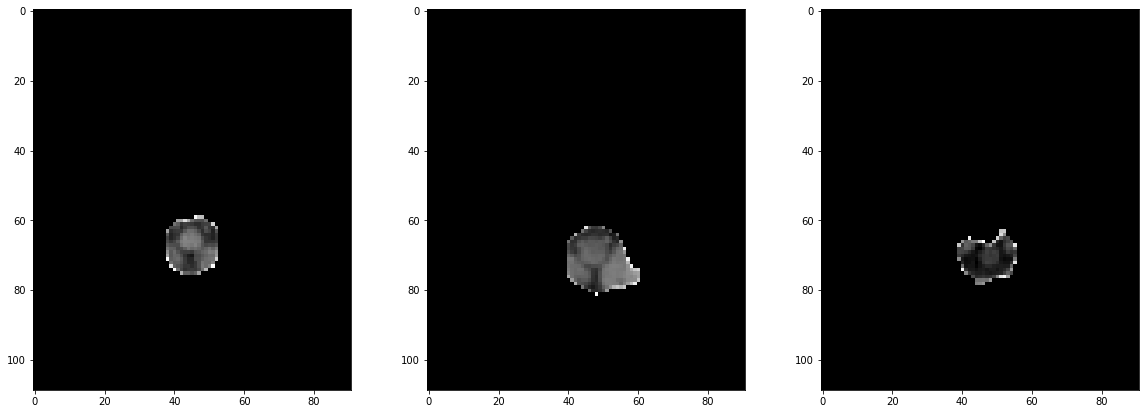


['2270965.nii', '2548328.nii', '1520491.nii'] [4, 4, 6]


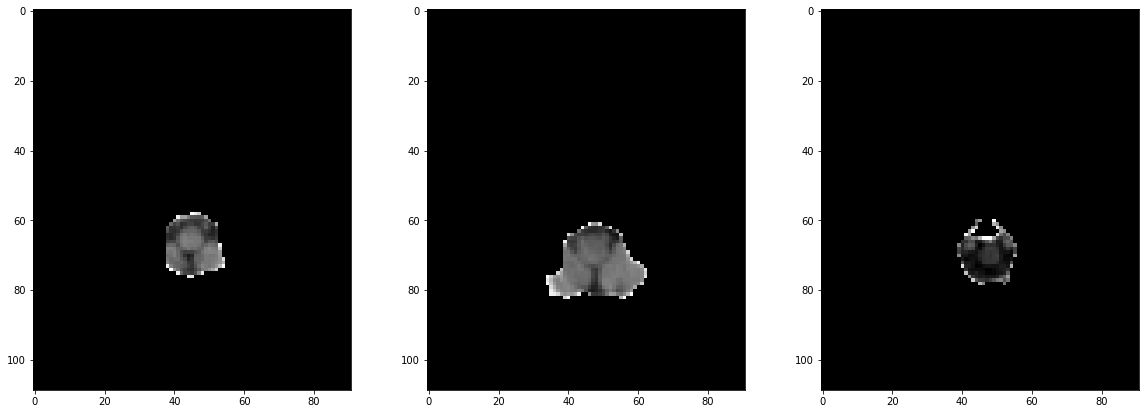


['2270965.nii', '2548328.nii', '1520491.nii'] [5, 5, 7]


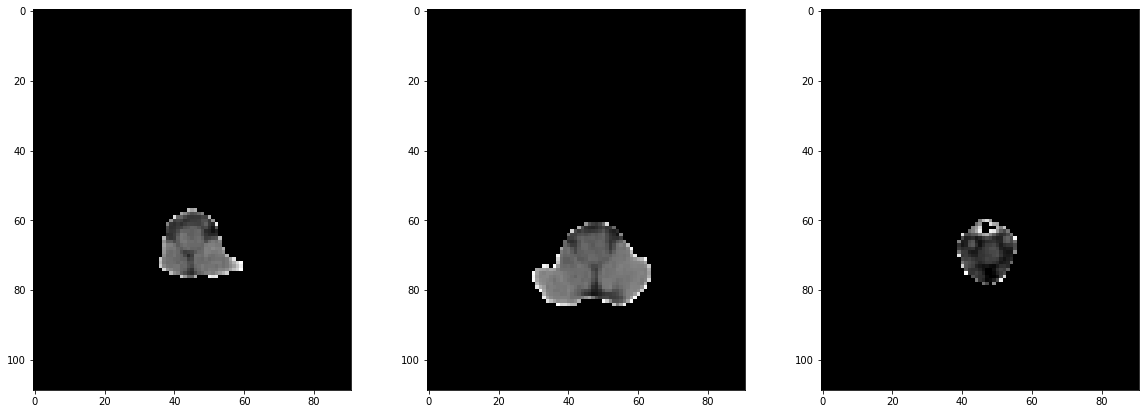


['2270965.nii', '2548328.nii', '1520491.nii'] [6, 6, 8]


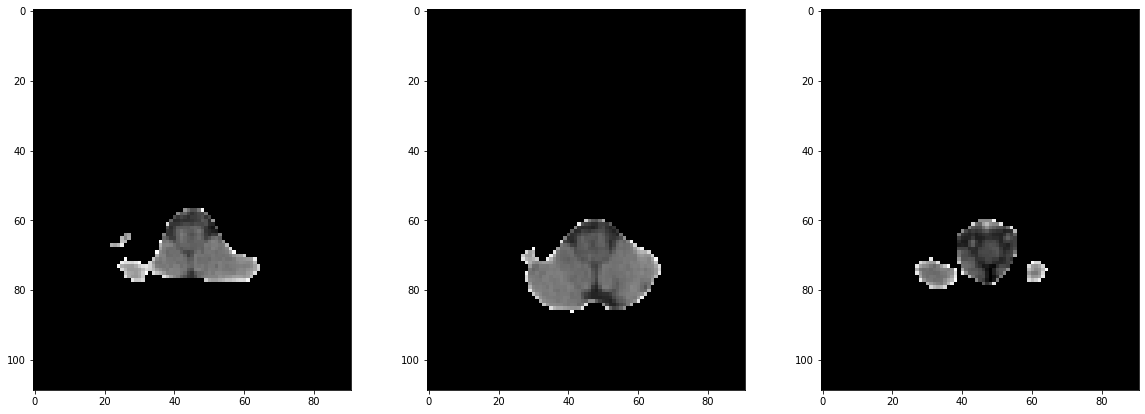


['2270965.nii', '2548328.nii', '1520491.nii'] [7, 7, 9]


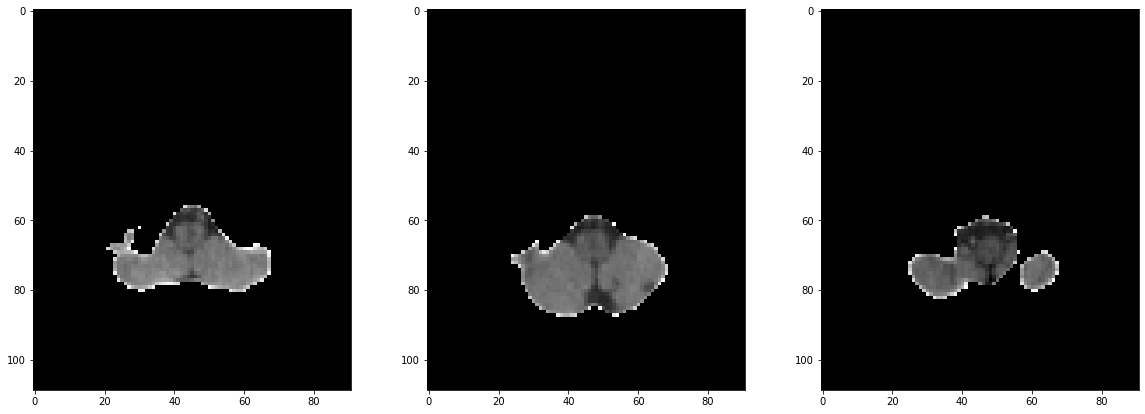


['2270965.nii', '2548328.nii', '1520491.nii'] [8, 8, 10]


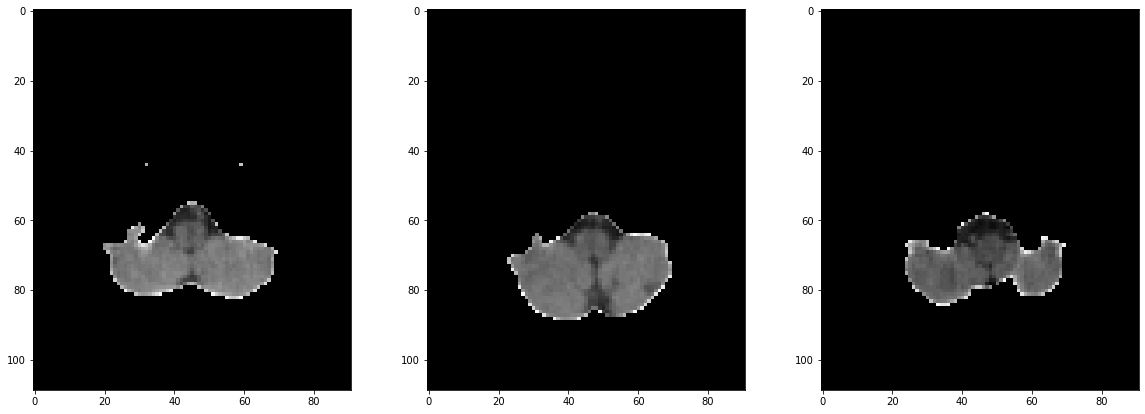


['2270965.nii', '2548328.nii', '1520491.nii'] [9, 9, 11]


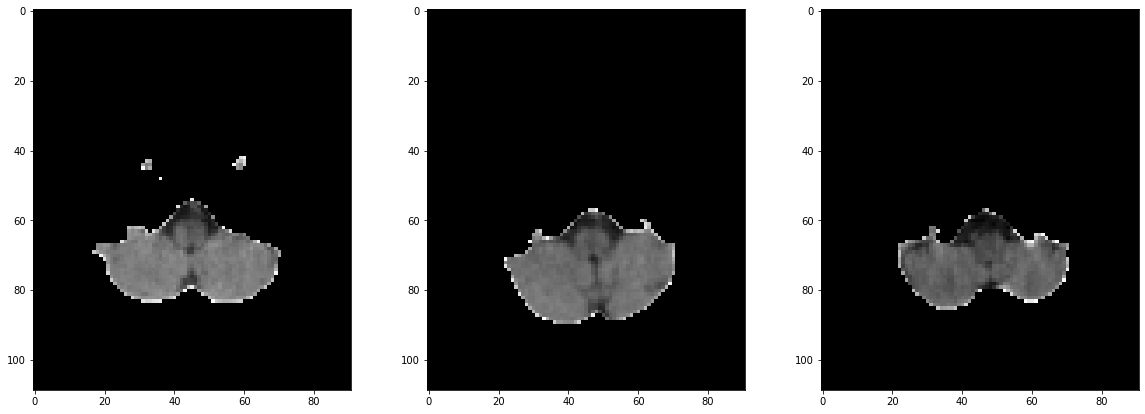


['2270965.nii', '2548328.nii', '1520491.nii'] [10, 10, 12]


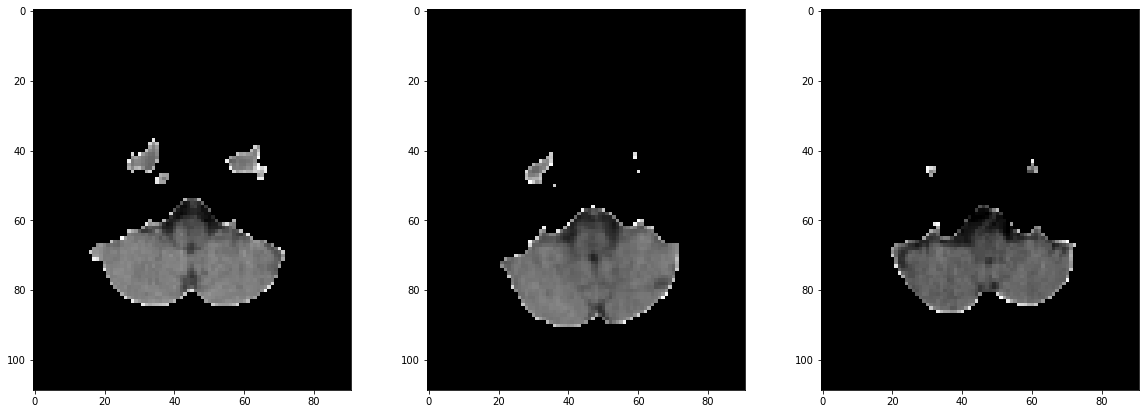


['2270965.nii', '2548328.nii', '1520491.nii'] [11, 11, 13]


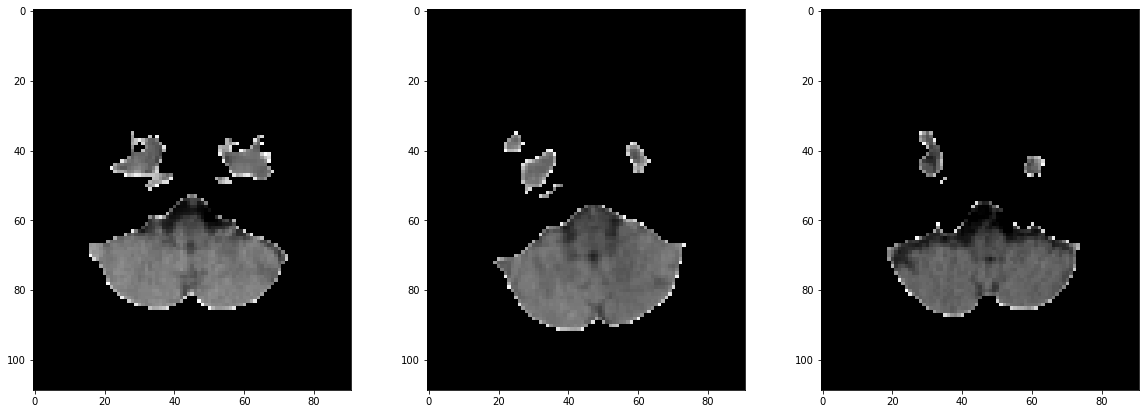


['2270965.nii', '2548328.nii', '1520491.nii'] [12, 12, 14]


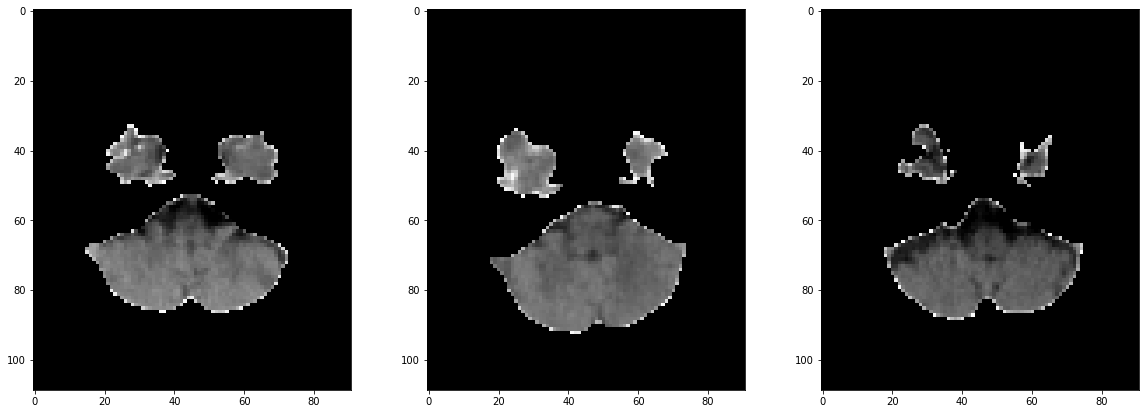


['2270965.nii', '2548328.nii', '1520491.nii'] [13, 13, 15]


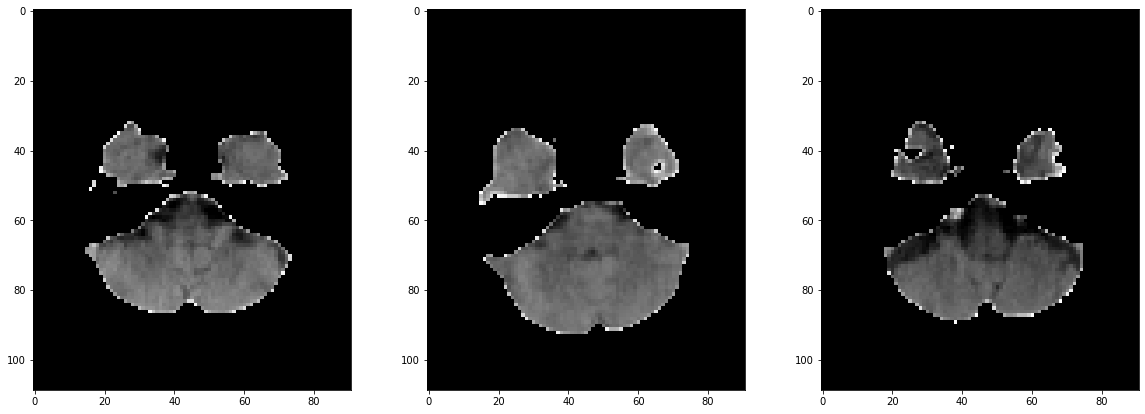


['2270965.nii', '2548328.nii', '1520491.nii'] [14, 14, 16]


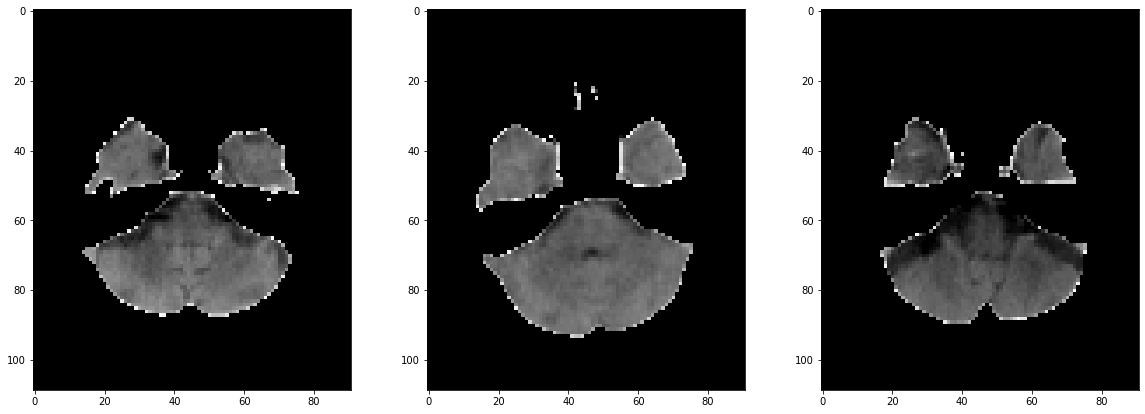


['2270965.nii', '2548328.nii', '1520491.nii'] [15, 15, 17]


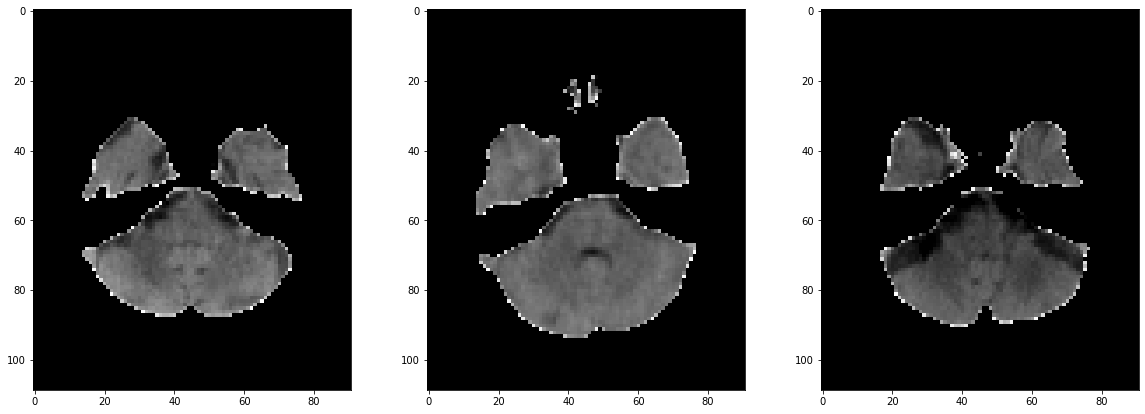

KeyboardInterrupt: Interrupted by user

In [27]:
N = 3
init_pos = [0 for i in range(N)]
sapo = [0 for i in range(N)]
np.random.shuffle(nccts)
while True:
    _, axs = plt.subplots(1, N, figsize = (20,7))
    for i in range(N):
        img = nib.load(ncct_dir+nccts[i]).get_fdata()
        if 0 in sapo:
            sapo[i] = 1
            while np.count_nonzero(img[:,:,init_pos[i]] > 0) < 100:
                init_pos[i] += 1
        else:
            init_pos[i] += 1
        img = img[:,:,init_pos[i]].T
        img = np.flip(img, 0)
        axs[i].imshow(img, cmap = "gray")
    print(nccts[:i+1], init_pos)
    plt.show()
    input()
    plt.close()

## Determine brain heights

In [12]:
def get_height(scan):
    height = 0
    in_brain = False
    for i in range(scan.shape[-1]):
        if np.count_nonzero(scan[:,:,i] > 0) > 100:
            in_brain = True
        else:
            if in_brain:
                break
        if in_brain:
            height += 1
    return height

In [13]:
heights = [get_height(nib.load(ncct_dir+nccts[i]).get_fdata()) for i in range(len(nccts))]

In [17]:
def bin_count(l):
    out = {}
    bins = np.bincount(l)
    i = 0
    for count in bins:
        if count > 0:
            out[i] = count
        i += 1
    return out
bins = bin_count(heights)

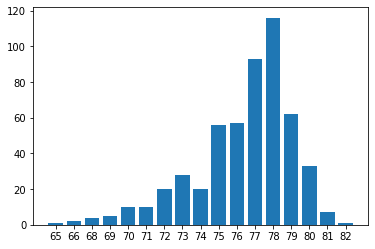

In [18]:
def plot_bins(data):
    plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()))
    plt.show()
    
plot_bins(bins)

In [23]:
nccts[heights.index(74)]

'2538003.nii'

## Frog face

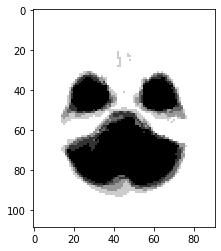

In [56]:
# img = img[:,:,init_pos[i]].T
# img = np.flip(img, 0)
ids = ["2466554.nii", "2630659.nii", "1520491.nii", "2270965.nii", "2548328.nii"]
index = [17, 17, 17, 15, 14]
faces = [nib.load(ncct_dir+ids[i]).get_fdata()[:,:,index[i]] for i in range(5)]
for f in faces: f[f > 0] = 1

# _, axs = plt.subplots(1, 5, figsize = (20,7))
# for i in range(5):
#     axs[i].imshow(np.flip(faces[i].T, 0), cmap = "gray")
    
face = (faces[0] + faces[1] + faces[2] + faces[3] + faces[4])/5
negative = 1 - face
plt.imshow(np.flip(negative.T, 0), cmap = "gray")

2270965.nii


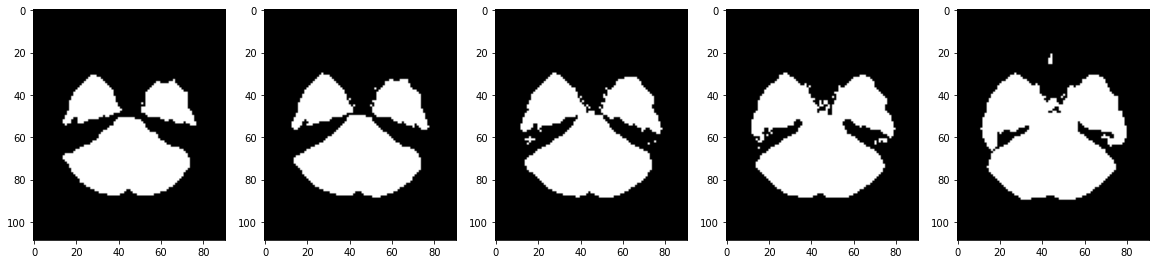


2548328.nii


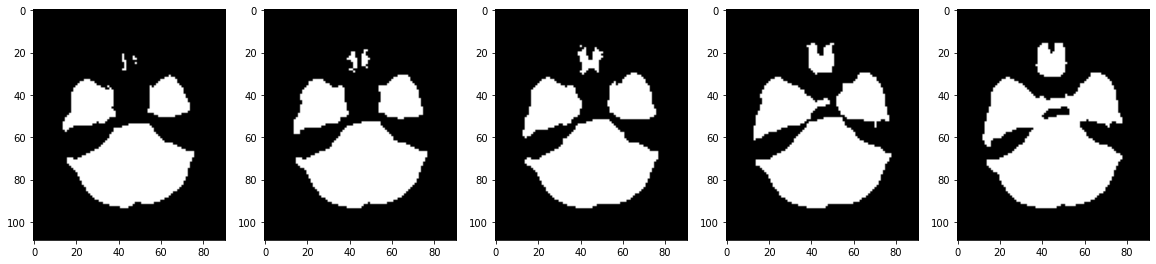


1520491.nii


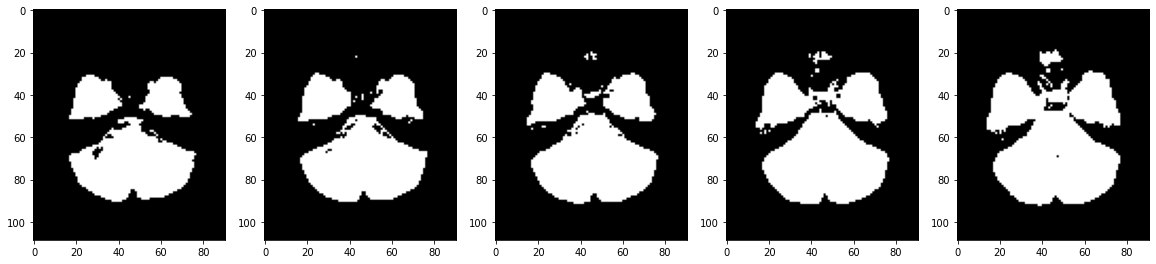


2232356.nii


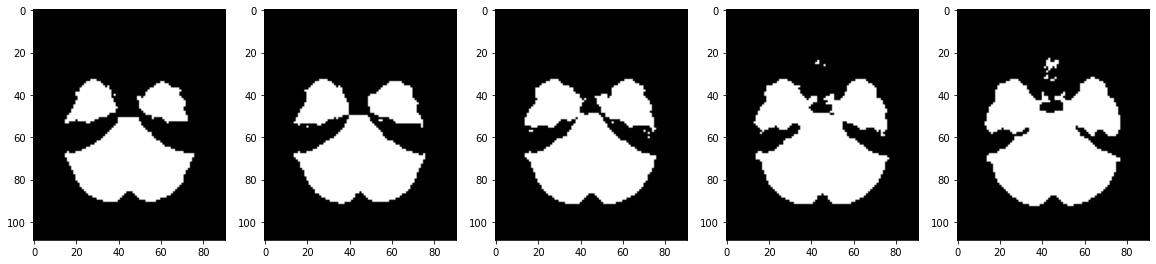


2183175.nii


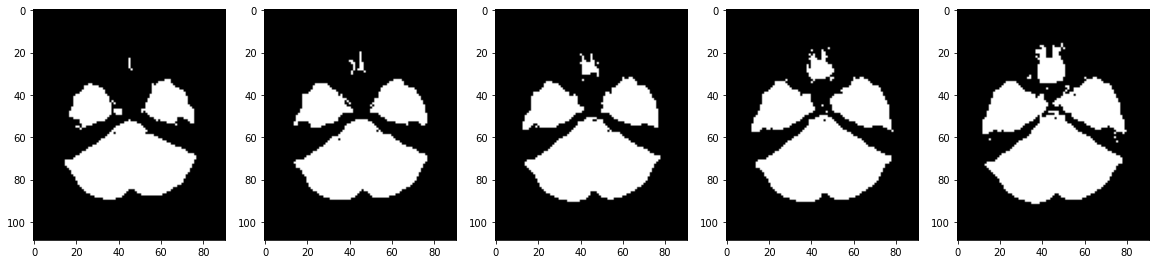


1080577.nii


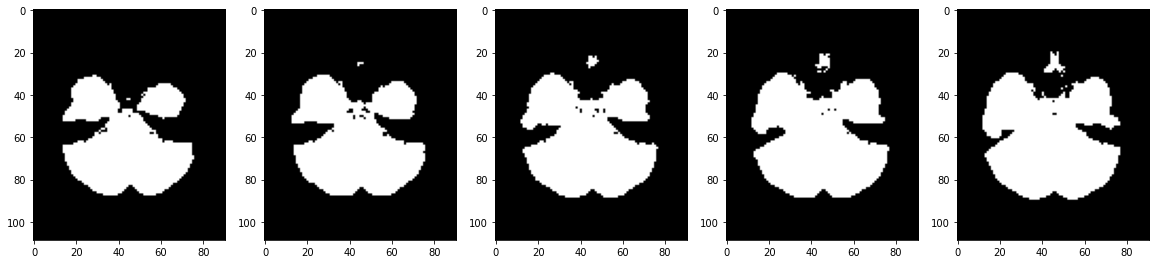


157447.nii


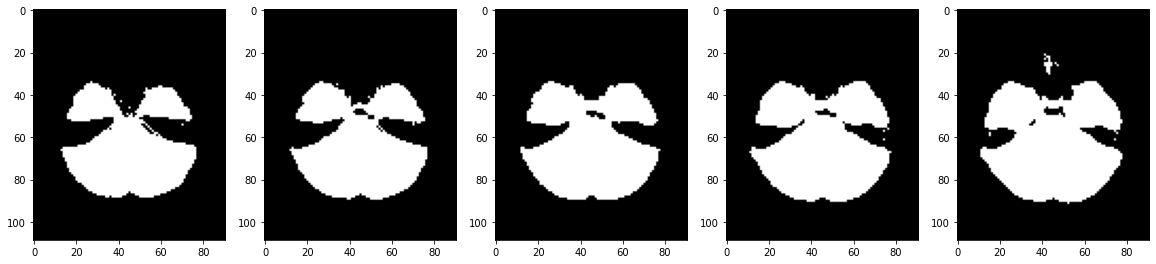


2582858.nii


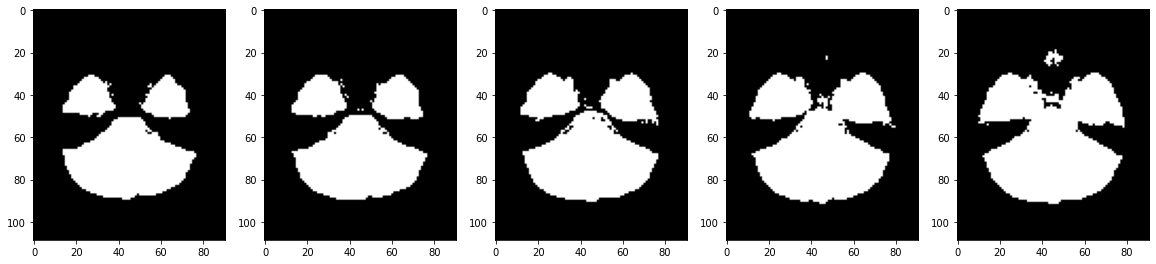


2164559.nii


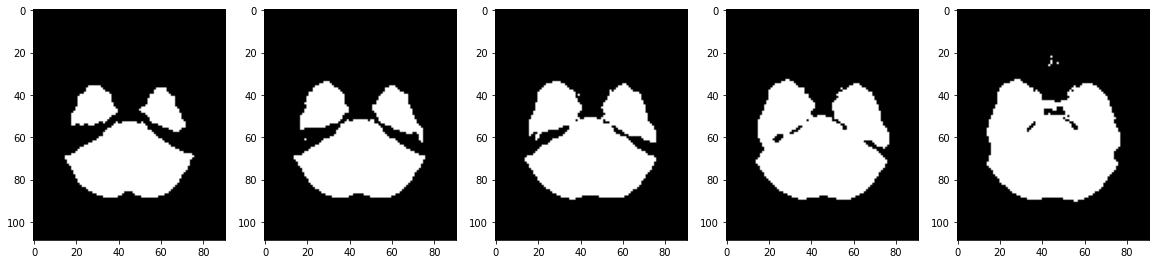


2275415.nii


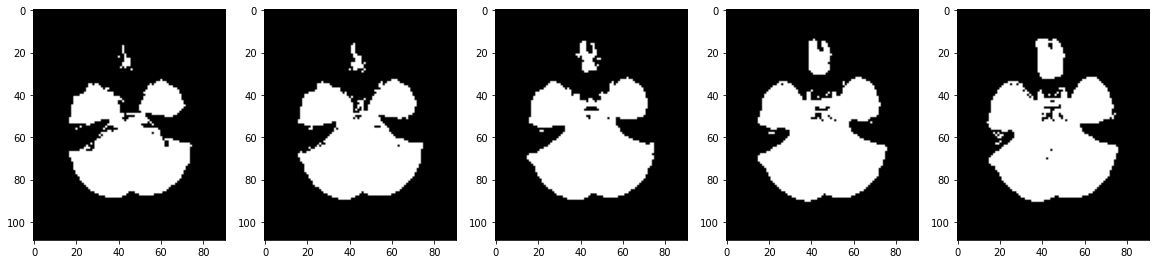


46149.nii


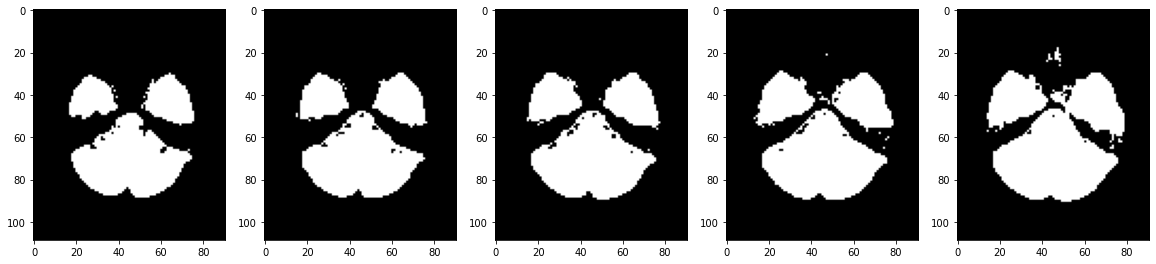

In [ ]:
for ncct in nccts:
    scan = nib.load(ncct_dir+ncct).get_fdata()
    scores = []
    for i in range(img.shape[-1]):
        ax_slice = scan[:,:,i]
        ax_slice[ax_slice > 0] = 1
        score = (ax_slice*face).sum() - (ax_slice*negative).sum()
        scores.append(score)
    i = np.argmax(scores)
    print(ncct)
    _, axs = plt.subplots(1, 5, figsize = (20,7))
    for j in range(5):
        axs[j].imshow(np.flip(scan[:,:,i+j].T, 0), cmap = "gray")
    plt.show()
    input()

# Assert `RandomFlip` augmentation

In [13]:
not_flipped = []
for ncct in nccts:
    filename = ncct_dir+ncct
    normal = nib.load(filename).get_fdata()
    flipped = nib.load(filename.replace(".nii", "-RandomFlip.nii")).get_fdata()
    if (normal == flipped).all():
        not_flipped.append( filename.split("/")[-1].replace(".nii", "") )

In [14]:
not_flipped

[]